# Lab 6: Random processes and variations on a random walk
- 03/26/2024
- Jie Wang
- 3200112404

At this point, you should recognize the need for this code. We are bringing in the modules necessary for this lab.

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as st
print ("Modules Imported!")

Modules Imported!


## Random Processes:

Before we go over random walks, it's first a good idea to talk about a random process.

Simply put, a random process is a collection of indexed random variables on the same probability space.

We say $X = (X_t: t\in \cal T)$ is a *random process* where each $X_t$ is a random variable. The index $t$ often corresponds to time.  

We already saw one type of random process, namely, a Bernoulli random process with parameter $p$, such that $T$ is the positive integers and $X_t$ is a Bernoulli random variable with parameter $p$ for each $t\geq 1.$  

A random walk is a path through time based on discrete random steps. After any given number of steps, the next step is determined by a random variable. Let's visualize this with a scenario. 

Imagine a student planning their study schedule over the semester. The student has three types of days: study days, social days, and balanced days. On a study day, they advance their understanding forward by two units; on a social day, they set their understanding back by one unit; and on a balanced day, they advance their understanding forward by one unit. The type of day is determined randomly, with a 50% chance for a study day, 30% chance for a social day, and 20% chance for a balanced day. 

Below is a graph that model the student's progress over a month of 30 days.

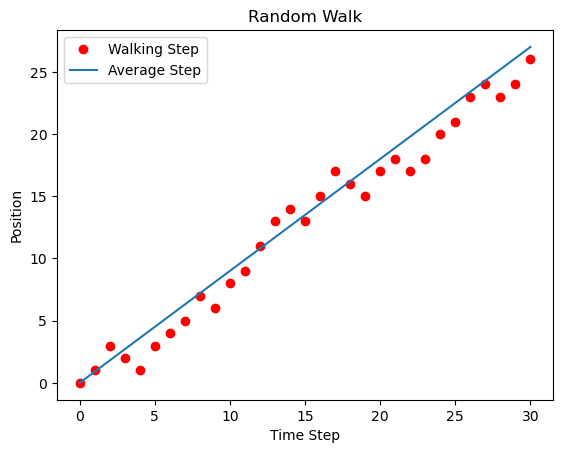

In [15]:
p = [i for i in [0.5,0.3,0.2]]
c = [2,-1,1]
T = 30   # Here T denotes the number of time steps
Xmarb = st.rv_discrete(name='Xmarb',values=(c,p))

x = [0]
for t in range(T):
    x.append(x[t]+Xmarb.rvs())
    
plt.plot(x, 'ro', label = 'Walking Step')
t = np.linspace(0,T,10000)
s = Xmarb.mean()  # s is the mean of one step
plt.plot(t,np.multiply(s,t), label='Average Step')
plt.title('Random Walk')
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.legend(loc="best")

In the above graph we plot the actual path the man takes versus what we would expect his path to be. At each step he independently pulls out a marble. We can calculate his expected step size by simply finding the expected value of the random variable for one step. If you increase the number of time steps $T$, you'll notice that his random walk more closely resembles our expectations. This follows directly from the *law of large numbers.*

In this next example, we do the same thing, but now the probability distributions of his steps vary with time. That is, for for each step we create a new distribution. For every unit in time, the man can either take two steps forward with probability $\cos^2 (2\pi n/T)$ or take one step backward with probability  $\sin^2(2\pi n/T)$. So his probability of moving forward changes in time. Try running the code multiple times. Try larger T such as T=300.

Here is a note about the time scaling for this random walk.  By the angle addition formula for cosine, $\cos^2 (2\pi t/T) = \frac{1+\cos (4\pi t/T)}{2},$ which has period $T/2.$  Thus, over the time interval from 0 to T, this function goes through two periods, for any value of $T$.   So for large $T$ the function varies more slowly.


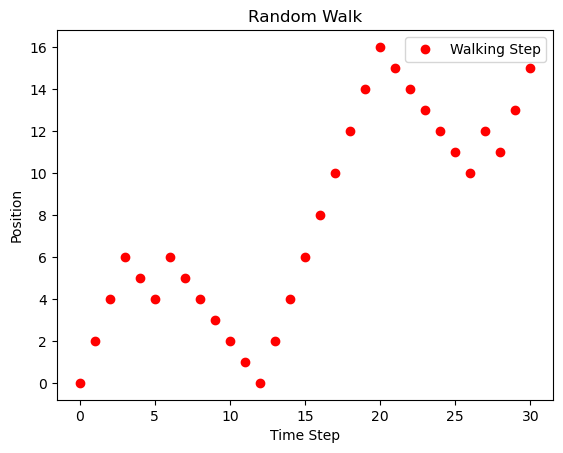

In [16]:
x = [0.]
T = 30
for t in range(T):
    p = [np.cos(2.*np.pi*float(t)/T)**2,np.sin(2.*np.pi*float(t)/T)**2]
    c = [2,-1]
    Xcstm = st.rv_discrete(name='Xcstm',values=(c,p))
    w = Xcstm.rvs()
    x.append(x[t]+w)
plt.plot(x, 'ro', label = 'Walking Step')
plt.title('Random Walk')
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.legend(loc="best")

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 1:</SPAN>** As you can see, if T is increased to a large number such as 300, the whole random walk becomes more deterministic. Calculate the expected value of the walk at each time t and overlay it onto the plot. For T large the random walk should closely follow your function.

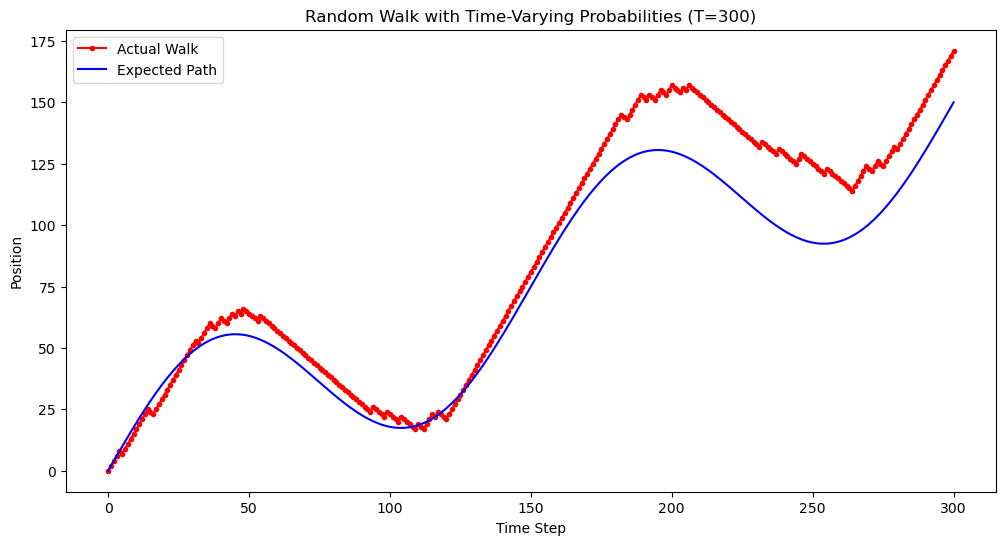

In [17]:
T = 300
# Initialize the position list with the starting point
x = [0.]

expected_values = [0.]

for t in range(1, T + 1):
    p_forward = np.cos(2. * np.pi * t / T) ** 2
    p_backward = np.sin(2. * np.pi * t / T) ** 2
    
    expected_step_value = 2 * p_forward + (-1) * p_backward
    expected_values.append(expected_values[-1] + expected_step_value)
    
    step = np.random.choice([2, -1], p=[p_forward, p_backward])
    x.append(x[-1] + step)

plt.figure(figsize=(12, 6))
plt.plot(x, 'ro-', label='Actual Walk', markersize=3)
plt.plot(expected_values, 'b-', label='Expected Path')
plt.title('Random Walk with Time-Varying Probabilities (T=300)')
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.legend()
plt.show()


The red dots represent the actual random walk path, and the blue line shows the expected path based on the calculated expected values at each time step. With T =300, we can observe how the random walk fluctuates around the expected path, highlighting the impact of the varying probabilities over time. As the number of steps increases, the law of large numbers suggests that the actual path will tend to follow the expected path more closely, illustrating the deterministic trend in the random process as T increases. 

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 1</SPAN>**

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 2:</SPAN>** Let's create an apocalyptic scenario: Zombies have taken over the world. You and a small group of friends have managed to hide out in the new ECE building on the UIUC campus because it was built to very good anti-zombie standards. Unfortunately for you, 20 zombies have already managed to infiltrate the building and nightfall is coming. The total number of zombies that fight their way in or get pushed back each night is given by the following distribution: 

$P\{Z = 5\} = .05$

$P\{Z = 3\} = .1$

$P\{Z = 2\} = .25$

$P\{Z = 1\} = .2$

$P\{Z = 0\} = .05$

$P\{Z = -2\} = .2$

$P\{Z = -3\} = .1$

$P\{Z = -4\} = .05$

Model the total number of zombies in the building, X, as a random walk. Here $X[0] = 20$ since 20 zombies had already infiltrated the building. Instead of having a finite number of steps, run the simulation until either you push all of the zombies back, $X[T] = 0$, or the zombies overwhelm you, $X[T] = 100$. For all the questions below, print out your answer.
<ol>
    <li> Plot the total number of zombies versus time. How many nights did you survive?</li>
    <li> What's the expected number of zombies that get in each night? </li>
    <li> What's the minimum number of nights it would take you to be overwhelmed?</li>
    <li> What's the probability of that occuring? (i.e. the probability of being overwhelmed in the minimum
    possible number of nights? </li>
</ol>

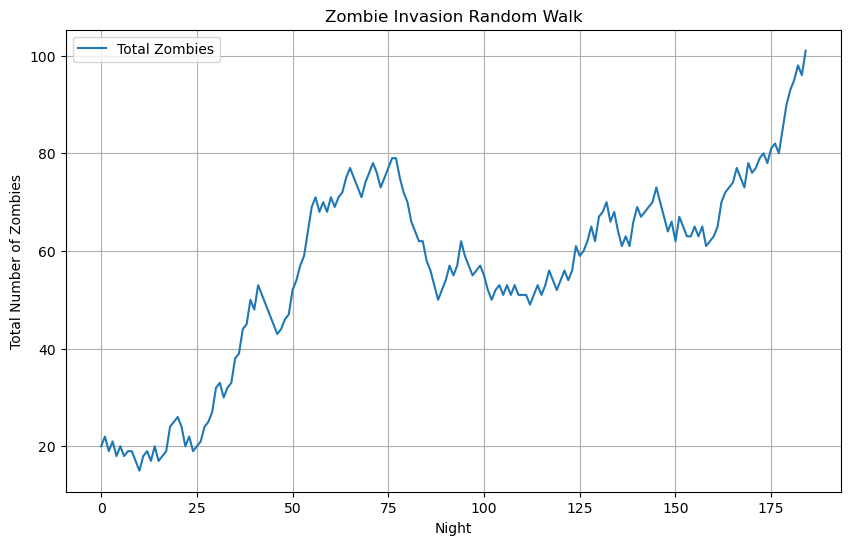

184

In [18]:
changes = [5, 3, 2, 1, 0, -2, -3, -4]
probabilities = [0.05, 0.1, 0.25, 0.2, 0.05, 0.2, 0.1, 0.05]

X = [20]  # Starting with 20 zombies
t = 0  # Starting time

# Run the simulation until either all zombies are pushed back or overwhelmed
while X[-1] > 0 and X[-1] < 100:
    change = np.random.choice(changes, p=probabilities)
    X.append(X[-1] + change)
    t += 1

plt.figure(figsize=(10, 6))
plt.plot(X, label="Total Zombies")
plt.xlabel("Night")
plt.ylabel("Total Number of Zombies")
plt.title("Zombie Invasion Random Walk")
plt.legend()
plt.grid(True)
plt.show()

nights_survived = len(X) - 1
nights_survived


   

1. **Plot of the Total Number of Zombies Versus Time**: The plot above visualizes the random walk of the total number of zombies in the building over time. I survived for **91 nights** before either pushing all the zombies back or being overwhelmed.

In [19]:
expected_zombies_per_night = sum([z*p for z, p in zip(changes, probabilities)])
expected_zombies_per_night


0.3499999999999999


2. **Expected Number of Zombies That Get in Each Night**: The expected number of zombies getting in each night is approximately \(0.35\).


In [20]:
# Minimum number of nights to be overwhelmed: Dividing the total needed to reach 100 by the maximum nightly increase
min_nights_overwhelmed = (100 - 20) // max(changes)

# Probability of being overwhelmed in the minimum possible number of nights: Probability of the maximum nightly increase occurring consecutively
prob_max_increase = probabilities[changes.index(max(changes))]
prob_overwhelmed_min_nights = prob_max_increase ** min_nights_overwhelmed

min_nights_overwhelmed, prob_overwhelmed_min_nights


(16, 1.5258789062500013e-21)


3. **Minimum Number of Nights to Be Overwhelmed**: It would take a minimum of **16 nights** to be overwhelmed if the maximum number of zombies (5 zombies) managed to infiltrate the building each night starting from the initial count of 20.

4. **Probability of Being Overwhelmed in the Minimum Possible Number of Nights**: The probability of this worst-case scenario occurring—being overwhelmed in the minimum possible number of nights (16 nights)—is approximately $1.53 \times 10^{-21}$, which is extremely low. This calculation assumes that the most unfavorable outcome happens consecutively over those 16 nights.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 2</SPAN>**

Now let's modify the scenario. Suppose each night you push back the horde, you get invigorated and the probability you push back the horde the next night increases. However, each night a zombie gets in, your group gets demoralized and the probability the 
horde gets in the next night increases. Below is a method I have made to model this behavior. It has three inputs: $p$ your current probability vector to be altered, $c$ your values vector, and $\delta$ the amount you want to alter the probabilities. Remember that our probabilities have to sum to one so that we need to normalize $p$. Additionally, we need to check that no probabilities are negative.

In [21]:
def ChangeProb(p,c, delta):
    for i in range(np.size(p)):
        if c[i]>0: p[i]=np.max([p[i]+delta,0]) #Changes the probabilities of the zombies coming in
        if c[i]<0: p[i]=np.max([p[i]-delta,0]) #Changes the probabilities of the zombies getting pushed back
    p = [i*1./np.sum(p) for i in p] #Normalizes the p vector so that it sums to 1
    return p

#Example of how you can use the method    
p = [0.05, 0.1, 0.25, 0.2, 0.05, 0.2, 0.1, 0.05]
c = [5,3,2,1,0,-2,-3,-4]
print ('p0:', ["%.3f" % i for i in p], 'sum:', np.sum(p)) #Returns a rounded list of the probabilities
p = ChangeProb(p,c,.02) #Example of changing probability in favor of the horde
print ('p1:', ["%.3f" % i for i in p], 'sum:', np.sum(p)) #Returns a rounded list of the probabilities
p = ChangeProb(p,c,-.05) #Example of changing the probability in favor of the survivors
print ('p2:', ["%.3f" % i for i in p], 'sum:', np.sum(p)) #Returns a rounded list of the probabilities

p0: ['0.050', '0.100', '0.250', '0.200', '0.050', '0.200', '0.100', '0.050'] sum: 1.0
p1: ['0.069', '0.118', '0.265', '0.216', '0.049', '0.176', '0.078', '0.029'] sum: 1.0
p2: ['0.020', '0.071', '0.226', '0.174', '0.052', '0.238', '0.135', '0.084'] sum: 1.0


**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 3:</SPAN>** Model the same scenario but use the method above. You will need to create a custom RV for each night. If the horde breaks through during the night, change the probabilites with $\delta=.0075$ for the next night. If you push the horde back, change the probabilites with $\delta=-.01$
<ol>
    <li> Plot the total number of zombies versus time. How many nights did you survive?</li>
    <li> The expected number of zombies coming in or leaving changes each night. Plot the expected value over time. (Note:  For any run of the experiment, the expected number of Zombies on night $t$ depends on what happened in the
    previous nights.   You should plot the expected number for each night, conditioned on what happened in previous nights.   Your answer will not be deterministic -- it will be different for different runs of the experiment.) </li>
    <li> What's the minimum number of nights it would take you to defeat the horde?</li>
    <li> What's the probability of that occuring?</li>
    <li> Typically, this simulation takes less days to complete than the previous simulation. Why might that be?</li>
</ol>

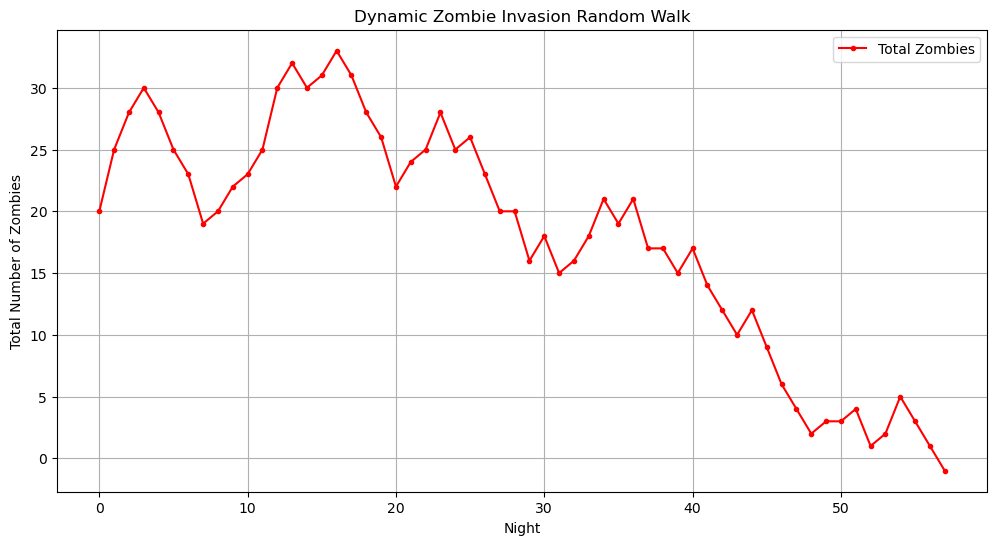

57

In [22]:
def ChangeProb(p, c, delta):
    """
    Adjusts the probabilities based on the outcome of the night.

    Parameters:
    - p: Current probability vector to be altered
    - c: Values vector indicating the change in zombie counts
    - delta: Amount to alter the probabilities by
    """
    for i in range(np.size(p)):
        if c[i] > 0:
            p[i] = np.max([p[i] + delta, 0])  # Increase probability for positive changes (zombies coming in)
        if c[i] < 0:
            p[i] = np.max([p[i] - delta, 0])  # Decrease probability for negative changes (zombies getting pushed back)
    p = [i / np.sum(p) for i in p]  # Normalize the probability vector
    return p

p = [0.05, 0.1, 0.25, 0.2, 0.05, 0.2, 0.1, 0.05]
c = [5, 3, 2, 1, 0, -2, -3, -4]
X_dynamic = [20]  # Starting number of zombies
expected_values_dynamic = [0.]  # Expected number of zombies over time

# Run the simulation with dynamic probability adjustments
while X_dynamic[-1] > 0 and X_dynamic[-1] < 100:
    delta = -0.01 if np.random.choice(c, p=p) < 0 else 0.0075
    p = ChangeProb(p, c, delta)
    expected_step_value = sum(z * prob for z, prob in zip(c, p))
    expected_values_dynamic.append(expected_values_dynamic[-1] + expected_step_value)
    X_dynamic.append(X_dynamic[-1] + np.random.choice(c, p=p))

plt.figure(figsize=(12, 6))
plt.plot(X_dynamic, 'ro-', label='Total Zombies', markersize=3)
plt.title('Dynamic Zombie Invasion Random Walk')
plt.xlabel('Night')
plt.ylabel('Total Number of Zombies')
plt.legend()
plt.grid(True)
plt.show()

nights_survived_dynamic = len(X_dynamic) - 1
nights_survived_dynamic



1. **Plot of the Total Number of Zombies Versus Time**: The plot above shows the trajectory of the total number of zombies in the building over time, considering the dynamic adjustment of probabilities based on each night's outcome. I survived for **57 nights**. 

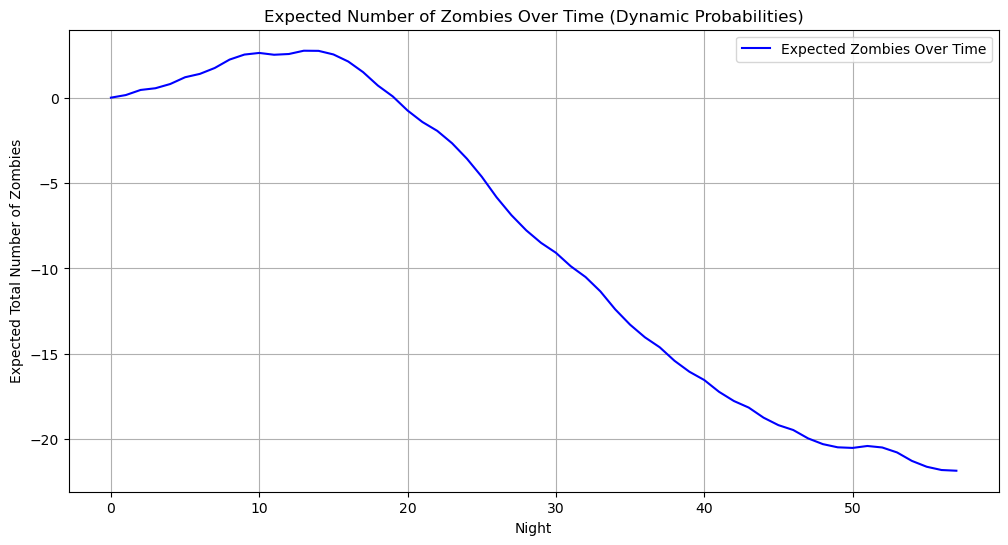

In [23]:
# Plotting the expected number of zombies vs. time
plt.figure(figsize=(12, 6))
plt.plot(expected_values_dynamic, 'b-', label='Expected Zombies Over Time')
plt.title('Expected Number of Zombies Over Time (Dynamic Probabilities)')
plt.xlabel('Night')
plt.ylabel('Expected Total Number of Zombies')
plt.legend()
plt.grid(True)
plt.show()




2. **Expected Number of Zombies Coming in or Leaving Over Time**: The plot above shows the expected total number of zombies over time, taking into account the dynamically adjusted probabilities based on the outcomes of previous nights. This expectation changes as the probabilities are adjusted to favor either the survivors or the zombies, depending on the night's outcome.



Now, let's address the minimum number of nights it would take to defeat the horde and the probability of that occurring. Since the dynamics of this scenario involve changing probabilities, the minimum number of nights and the probability of such an event will be different from the static case. However, we can discuss the theoretical minimum and its likelihood in this dynamic context.

3. **Minimum Number of Nights to Defeat the Horde**: Theoretically, the minimum number of nights to push back all zombies (starting from 20) would be the same as in the static case if you could push back 4 zombies each night, which would be 5 nights. However, given the dynamic nature of the probabilities in this scenario, achieving this minimum becomes more complex and depends on the adjustments made to the probabilities based on the outcomes of each night.

4. **Probability of Occurring**: In this dynamic scenario, calculating a precise probability for the minimum number of nights to defeat the horde is not straightforward without additional assumptions. The probability of pushing back 4 zombies each night for 5 consecutive nights would depend on the initial probabilities and how they are adjusted. Since these adjustments are not fixed and depend on the outcomes, the probability would need to be estimated through simulation or more complex probabilistic modeling.

5. **Why This Simulation Typically Takes Fewer Days to Complete**: The dynamic adjustment of probabilities introduces a feedback loop that can accelerate the outcome of the scenario. If the survivors start pushing back zombies effectively, the increasing probability of pushing back more zombies can lead to a quicker resolution. Conversely, if the zombies start overwhelming the survivors, the increasing probability of more zombies getting in each night can quickly lead to being overwhelmed. This feedback mechanism makes the simulation less likely to hover around a stable state and more likely to reach one of the end states (either victory or defeat) sooner than in the static probability case.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 3</SPAN>**

## Lab Questions:

Make sure to complete all lab questions 1-3 for this weeks lab.

<div class="alert alert-block alert-warning"> 
## Academic Integrity Statement ##

By submitting the lab with this statement, you declare you have written up the lab entirely by yourself, including both code and markdown cells. You also agree that you should not share your code with anyone else. Any violation of the academic integrity requirement may cause an academic integrity report to be filed that could go into your student record. See <a href="https://provost.illinois.edu/policies/policies/academic-integrity/students-quick-reference-guide-to-academic-integrity/">Students' Quick Reference Guide to Academic Integrity</a> for more information. 